<a href="https://colab.research.google.com/github/ARYAN-khatri83/EDA/blob/main/21BDS0352_DA_1_TH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/stars%20type.csv"

df = pd.read_csv(url)
print("Dataset loaded successfully!")
df.head()


Dataset loaded successfully!


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.0024,0.1700,16.12,0,Red,M
1,3042,0.0005,0.1542,16.60,0,Red,M
2,2600,0.0003,0.1020,18.70,0,Red,M
3,2800,0.0002,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


### Data Cleaning and Handling

In [ ]:
print("Original columns:", df.columns.tolist())

df.columns = (df.columns
                .str.strip()
                .str.replace(r'[()]', '', regex=True)
                .str.replace('/', '_')
                .str.replace(" ", "_"))
print("Cleaned columns:", df.columns.tolist())

print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

df = df.drop_duplicates()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

print(df.describe(include='all'))


Original columns: ['Temperature_(K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute_magnitude(Mv)', 'Star_type', 'Star_color', 'Spectral_Class']
Cleaned columns: ['Temperature_K', 'LuminosityL_Lo', 'RadiusR_Ro', 'Absolute_magnitudeMv', 'Star_type', 'Star_color', 'Spectral_Class']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Temperature_K         240 non-null    int64   
 1   LuminosityL_Lo        240 non-null    category
 2   RadiusR_Ro            240 non-null    float64 
 3   Absolute_magnitudeMv  240 non-null    float64 
 4   Star_type             240 non-null    int64   
 5   Star_color            237 non-null    category
 6   Spectral_Class        240 non-null    category
dtypes: category(3), float64(2), int64(2)
memory usage: 19.3 KB
None

Missing values per column:
 Temperature_K           0
LuminosityL_Lo         

### 1D Visualization (Histogram and Boxplot)

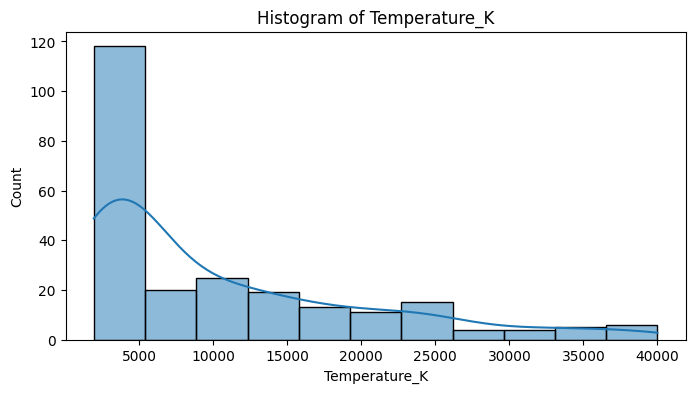

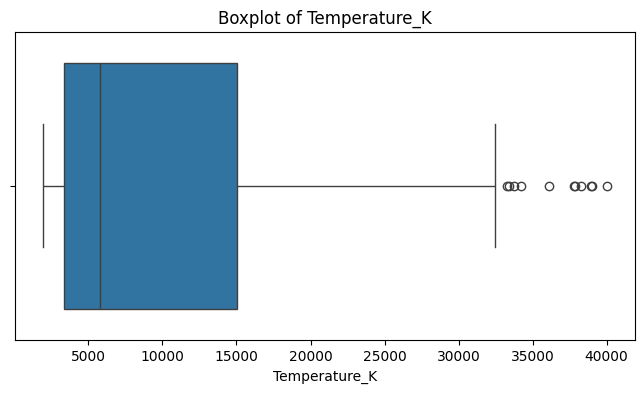

In [ ]:
numeric_col = 'Temperature_K' if 'Temperature_K' in df.columns else df.select_dtypes(include=[np.number]).columns[0]

plt.figure(figsize=(8, 4))
sns.histplot(df[numeric_col], kde=True)
plt.title(f"Histogram of {numeric_col}")
plt.xlabel(numeric_col)
plt.show()


plt.figure(figsize=(8, 4))
sns.boxplot(x=df[numeric_col])
plt.title(f"Boxplot of {numeric_col}")
plt.show()


### 2D Visualization (Scatter Plot and Correlation Heatmap)

Numeric columns: ['Temperature_K', 'RadiusR_Ro', 'Absolute_magnitudeMv', 'Star_type']


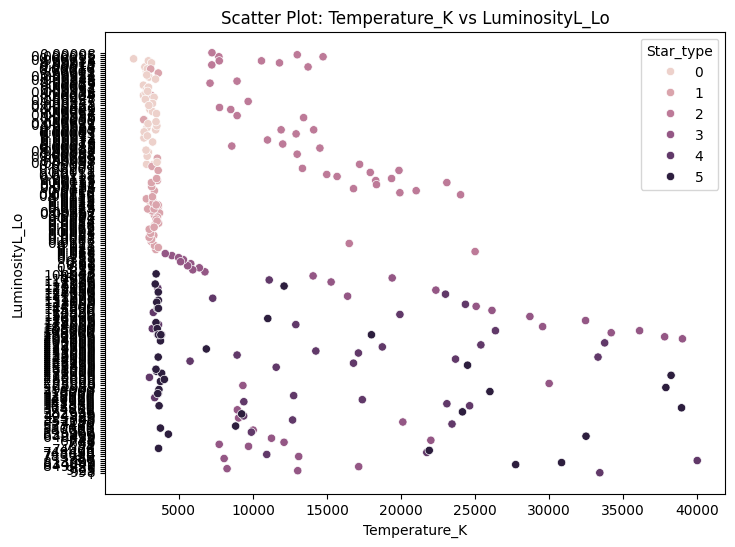

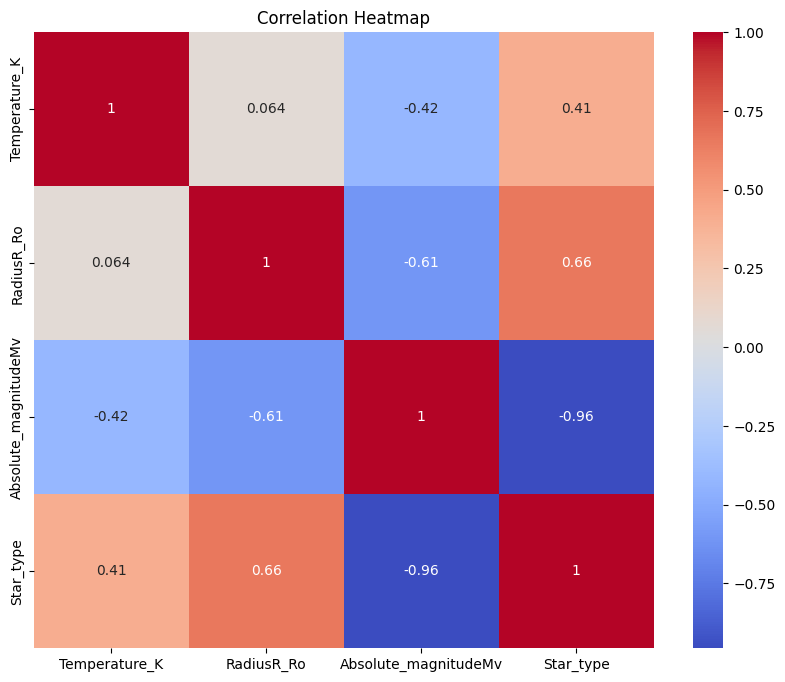

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)

if 'Temperature_K' in df.columns and 'LuminosityL_Lo' in df.columns:
    x_col, y_col = 'Temperature_K', 'LuminosityL_Lo'
else:
    x_col, y_col = numeric_cols[:2]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=x_col, y=y_col, hue='Star_type' if 'Star_type' in df.columns else None)
plt.title(f"Scatter Plot: {x_col} vs {y_col}")
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.show()

plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


###  N-D Visualization (Pairplot)

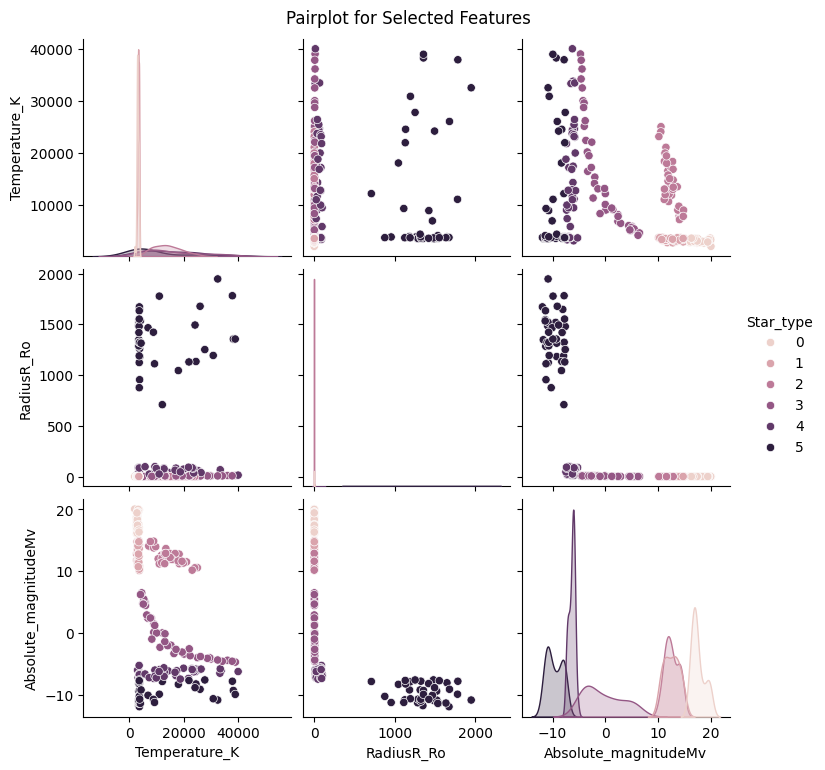

In [ ]:
selected_features = numeric_cols[:4]  # Adjust as needed

hue_col = 'Star_type' if 'Star_type' in df.columns else None

sns.pairplot(df[selected_features], hue=hue_col)
plt.suptitle("Pairplot for Selected Features", y=1.02)
plt.show()


### Time-Series Analysis

In [ ]:
print("No date/time column found; skipping time-series analysis.")


No date/time column found; skipping time-series analysis.


###  Analysis of 1D, 2D, and N-D Data

Summary statistics for numeric columns:
       Temperature_K   RadiusR_Ro  Absolute_magnitudeMv   Star_type
count     240.000000   240.000000            240.000000  240.000000
mean    10497.462500   237.157781              4.382396    2.500000
std      9552.425037   517.155763             10.532512    1.711394
min      1939.000000     0.008400            -11.920000    0.000000
25%      3344.250000     0.102750             -6.232500    1.000000
50%      5776.000000     0.762500              8.313000    2.500000
75%     15055.500000    42.750000             13.697500    4.000000
max     40000.000000  1948.500000             20.060000    5.000000


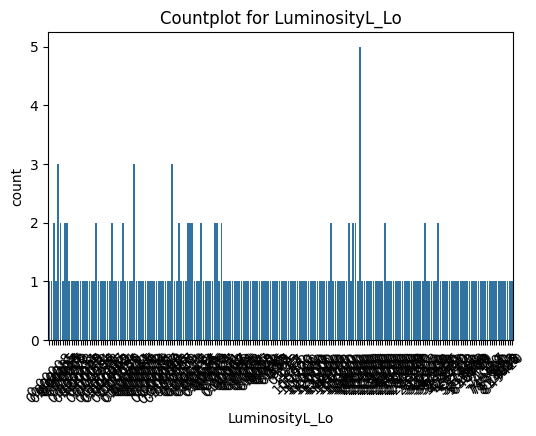

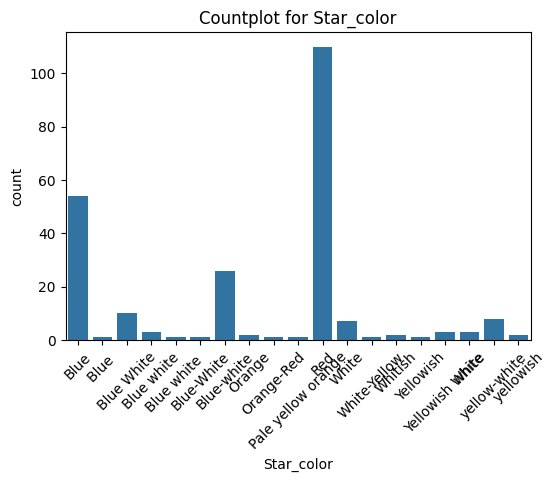

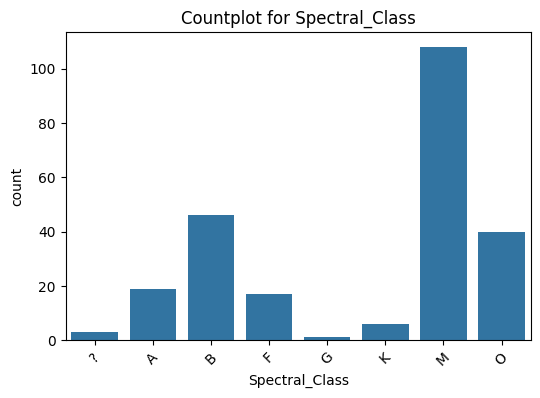

In [ ]:
print("Summary statistics for numeric columns:")
print(df.describe())

# Count plots for categorical variables
categorical_cols = df.select_dtypes(include=['category']).columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Countplot for {col}")
    plt.xticks(rotation=45)
    plt.show()


###  Dimensionality Reduction (Using PCA)

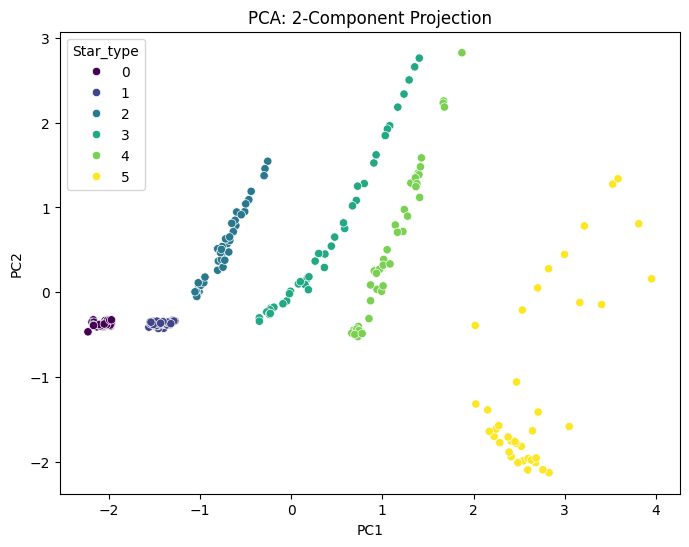

Explained variance ratio: [0.66756742 0.23562002]


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numeric_data = df[numeric_cols].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

if 'Star_type' in df.columns:
    pca_df['Star_type'] = df['Star_type'].values

plt.figure(figsize=(8,6))
if 'Star_type' in pca_df.columns:
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Star_type', palette="viridis")
else:
    sns.scatterplot(data=pca_df, x='PC1', y='PC2')
plt.title("PCA: 2-Component Projection")
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)


###  Model Building and Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

if 'Star_type' in df.columns:
    X = df[numeric_cols].dropna()
    y = df.loc[X.index, 'Star_type']

    if y.dtype.name == 'category' or y.dtype == 'object':
        le = LabelEncoder()
        y = le.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_scaled, y_train)

    y_pred = clf.predict(X_test_scaled)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
else:
    print("No target column 'Star_type' found; model building skipped.")


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

Confusion Matrix:
 [[ 8  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 11]]
Accuracy: 1.0
